
# Power spectral density (PSD)

Plotting power spectral density (PSD) using `~.Axes.psd`.

The PSD is a common plot in the field of signal processing. NumPy has
many useful libraries for computing a PSD. Below we demo a few examples
of how this can be accomplished and visualized with Matplotlib.


In [22]:
import pandas as pd
_8Hz_signal = pd.read_csv("./csv_from_xdf/ssvep_data_8Hz_raw.csv")
p3_8 = _8Hz_signal['P3'].to_numpy()
p4_8 = _8Hz_signal['P4'].to_numpy()
t_8 = _8Hz_signal['Time'].to_numpy()

_9Hz_signal = pd.read_csv("./csv_from_xdf/ssvep_data_9Hz_raw.csv")
p3_9 = _9Hz_signal['P3'].to_numpy()
p4_9 = _9Hz_signal['P4'].to_numpy()
t_9 = _9Hz_signal['Time'].to_numpy()

_10Hz_signal = pd.read_csv("./csv_from_xdf/ssvep_data_10Hz_raw.csv")
p3_10 = _10Hz_signal['P3'].to_numpy()
p4_10 = _10Hz_signal['P4'].to_numpy()
t_10 = _10Hz_signal['Time'].to_numpy()

_11Hz_signal = pd.read_csv("./csv_from_xdf/ssvep_data_11Hz_raw.csv")
p3_11 = _11Hz_signal['P3'].to_numpy()
p4_11 = _11Hz_signal['P4'].to_numpy()
t_11 = _11Hz_signal['Time'].to_numpy()

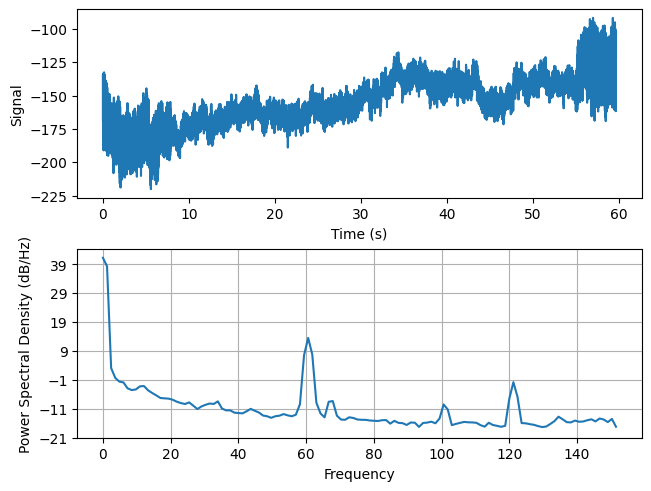

In [25]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.mlab as mlab

# # Fixing random state for reproducibility
# np.random.seed(19680801)

dt = 0.0033
# t = np.arange(0, 10, dt)
# nse = np.random.randn(len(t))
# r = np.exp(-t / 0.05)

# cnse = np.convolve(nse, r) * dt
# cnse = cnse[:len(t)]
# s = 0.1 * np.sin(2 * np.pi * t) + cnse

fig, (ax0, ax1) = plt.subplots(2, 1, layout='constrained')
ax0.plot(t_9, p4_9)
ax0.set_xlabel('Time (s)')
ax0.set_ylabel('Signal')
ax1.psd(p4_9, 250, 1 / dt)

plt.show()

Compare this with the equivalent Matlab code to accomplish the same thing::

    dt = 0.01;
    t = [0:dt:10];
    nse = randn(size(t));
    r = exp(-t/0.05);
    cnse = conv(nse, r)*dt;
    cnse = cnse(1:length(t));
    s = 0.1*sin(2*pi*t) + cnse;

    subplot(211)
    plot(t, s)
    subplot(212)
    psd(s, 512, 1/dt)

Below we'll show a slightly more complex example that demonstrates
how padding affects the resulting PSD.



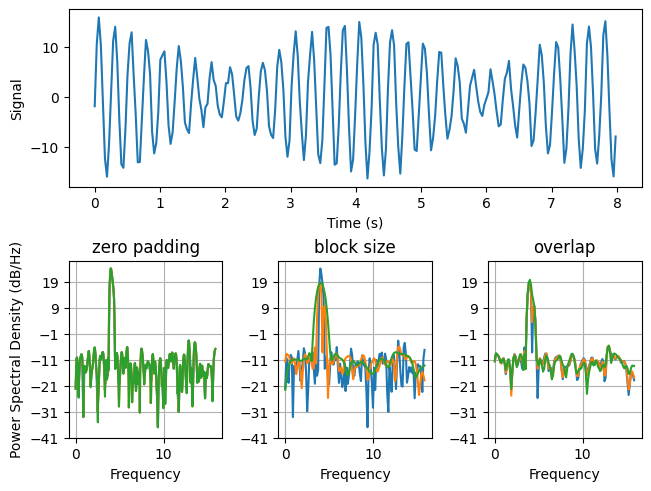

In [2]:
dt = np.pi / 100.
fs = 1. / dt
t = np.arange(0, 8, dt)
y = 10. * np.sin(2 * np.pi * 4 * t) + 5. * np.sin(2 * np.pi * 4.25 * t)
y = y + np.random.randn(*t.shape)

# Plot the raw time series
fig, axs = plt.subplot_mosaic([
    ['signal', 'signal', 'signal'],
    ['zero padding', 'block size', 'overlap'],
], layout='constrained')

axs['signal'].plot(t, y)
axs['signal'].set_xlabel('Time (s)')
axs['signal'].set_ylabel('Signal')

# Plot the PSD with different amounts of zero padding. This uses the entire
# time series at once
axs['zero padding'].psd(y, NFFT=len(t), pad_to=len(t), Fs=fs)
axs['zero padding'].psd(y, NFFT=len(t), pad_to=len(t) * 2, Fs=fs)
axs['zero padding'].psd(y, NFFT=len(t), pad_to=len(t) * 4, Fs=fs)

# Plot the PSD with different block sizes, Zero pad to the length of the
# original data sequence.
axs['block size'].psd(y, NFFT=len(t), pad_to=len(t), Fs=fs)
axs['block size'].psd(y, NFFT=len(t) // 2, pad_to=len(t), Fs=fs)
axs['block size'].psd(y, NFFT=len(t) // 4, pad_to=len(t), Fs=fs)
axs['block size'].set_ylabel('')

# Plot the PSD with different amounts of overlap between blocks
axs['overlap'].psd(y, NFFT=len(t) // 2, pad_to=len(t), noverlap=0, Fs=fs)
axs['overlap'].psd(y, NFFT=len(t) // 2, pad_to=len(t),
                   noverlap=int(0.025 * len(t)), Fs=fs)
axs['overlap'].psd(y, NFFT=len(t) // 2, pad_to=len(t),
                   noverlap=int(0.1 * len(t)), Fs=fs)
axs['overlap'].set_ylabel('')
axs['overlap'].set_title('overlap')

for title, ax in axs.items():
    if title == 'signal':
        continue

    ax.set_title(title)
    ax.sharex(axs['zero padding'])
    ax.sharey(axs['zero padding'])

plt.show()

This is a ported version of a MATLAB example from the signal
processing toolbox that showed some difference at one time between
Matplotlib's and MATLAB's scaling of the PSD.



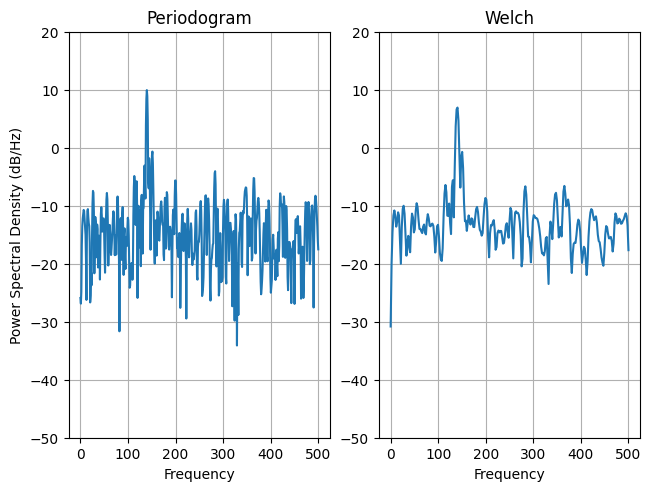

In [3]:
fs = 1000
t = np.linspace(0, 0.3, 301)
A = np.array([2, 8]).reshape(-1, 1)
f = np.array([150, 140]).reshape(-1, 1)
xn = (A * np.sin(2 * np.pi * f * t)).sum(axis=0)
xn += 5 * np.random.randn(*t.shape)

fig, (ax0, ax1) = plt.subplots(ncols=2, layout='constrained')

yticks = np.arange(-50, 30, 10)
yrange = (yticks[0], yticks[-1])
xticks = np.arange(0, 550, 100)

ax0.psd(xn, NFFT=301, Fs=fs, window=mlab.window_none, pad_to=1024,
        scale_by_freq=True)
ax0.set_title('Periodogram')
ax0.set_yticks(yticks)
ax0.set_xticks(xticks)
ax0.grid(True)
ax0.set_ylim(yrange)

ax1.psd(xn, NFFT=150, Fs=fs, window=mlab.window_none, pad_to=512, noverlap=75,
        scale_by_freq=True)
ax1.set_title('Welch')
ax1.set_xticks(xticks)
ax1.set_yticks(yticks)
ax1.set_ylabel('')  # overwrite the y-label added by `psd`
ax1.grid(True)
ax1.set_ylim(yrange)

plt.show()

This is a ported version of a MATLAB example from the signal
processing toolbox that showed some difference at one time between
Matplotlib's and MATLAB's scaling of the PSD.

It uses a complex signal so we can see that complex PSD's work properly.



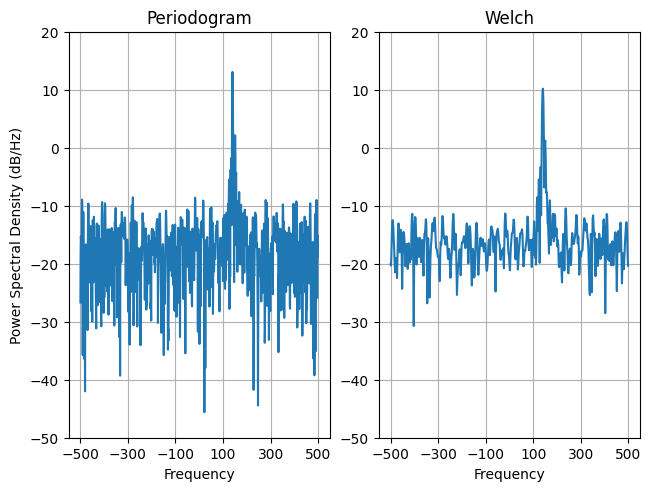

In [4]:
prng = np.random.RandomState(19680801)  # to ensure reproducibility

fs = 1000
t = np.linspace(0, 0.3, 301)
A = np.array([2, 8]).reshape(-1, 1)
f = np.array([150, 140]).reshape(-1, 1)
xn = (A * np.exp(2j * np.pi * f * t)).sum(axis=0) + 5 * prng.randn(*t.shape)

fig, (ax0, ax1) = plt.subplots(ncols=2, layout='constrained')

yticks = np.arange(-50, 30, 10)
yrange = (yticks[0], yticks[-1])
xticks = np.arange(-500, 550, 200)

ax0.psd(xn, NFFT=301, Fs=fs, window=mlab.window_none, pad_to=1024,
        scale_by_freq=True)
ax0.set_title('Periodogram')
ax0.set_yticks(yticks)
ax0.set_xticks(xticks)
ax0.grid(True)
ax0.set_ylim(yrange)

ax1.psd(xn, NFFT=150, Fs=fs, window=mlab.window_none, pad_to=512, noverlap=75,
        scale_by_freq=True)
ax1.set_title('Welch')
ax1.set_xticks(xticks)
ax1.set_yticks(yticks)
ax1.set_ylabel('')  # overwrite the y-label added by `psd`
ax1.grid(True)
ax1.set_ylim(yrange)

plt.show()